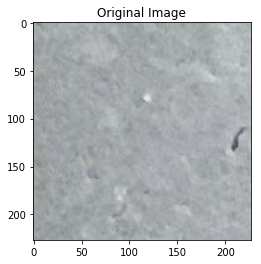

ValueError: not enough values to unpack (expected 3, got 2)

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to find the largest contour area
def findGreatestContour(contours):
    areas = []
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        areas.append(area)
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
        i+=1
    return largest_area, largest_contour_index, areas

# Function to find and return pre-processed images from an input image
def image_derivatives(img):
  # Convert to gray
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Otsu's Thresholding
  ''' Global threshold is used to binarize the image; works on individual images and is much more efficient than local binarization '''
  blur = cv2.GaussianBlur(imgray,(5,5),0)
  theta,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  binarized = (255-otsu) # In OpenCV object detection, object=white & background=black

  # Finding Contours
  ''' A contour is a curve joining all the continuous points(along the boundary), having same color/intensity '''
  image, contours, hierarchy = cv2.findContours(binarized,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  # Making a copy as drawContours manipulates the original
  img_copy = img.copy()

  # Drawing Contours
  crack_highlight = cv2.drawContours(img, contours, -1, (255,0,0), 1) # The last param is the width of the contour (adjust it if you need)

  # Finding largest crack
  largest_area, largest_contour_index, areas = findGreatestContour(contours)
  cnt = contours[largest_contour_index]
  rect = cv2.minAreaRect(cnt)
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  bounding_box = cv2.drawContours(img_copy,[box],0,(0,0,255),2)  

  # returns the final image with the thresholded image and the cracks highlighted image
  return (binarized, crack_highlight, bounding_box, largest_area)

# Function to return white/black pixel ratio
def white_black_ratio(img):
  pixel_vals={"white":0, "black":0}
  for i in range(227):
    for j in range(227):
      if(img[i][j]==0):
        pixel_vals["black"]+=1
      else:
        pixel_vals["white"]+=1
  # return white/black pixel ratio      
  return (pixel_vals["white"]/pixel_vals["black"])

# Classify as crack or no-crack
def crack_or_no_crack(img):
  if (white_black_ratio(img)<0.3):
    return "Crack"
  else:
    return "No Crack"

# Putting it to use
im = cv2.imread("C:/Users/SRIKANTH/Desktop/CrackCNN/customtest2/00001.jpg")
plt.imshow(im, cmap="gray")
plt.title("Original Image")
plt.show()
thresholded, highlight, major_crack, major_crack_area = image_derivatives(im)
plt.imshow(thresholded, cmap="gray")
plt.title("Thresholded Image")
plt.show()
plt.imshow(highlight)
plt.title("Crack Highlighted Image")
plt.show()
plt.imshow(major_crack)
plt.title("Major Crack")
plt.show()
print("The Area of the major crack :",major_crack_area)
print("The Given Image is classified as:",crack_or_no_crack(thresholded))